In [212]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn")

## Load and inspect data

In [2]:
df_test = pd.read_csv("../data/sag_data_test.csv", index_col="Time", parse_dates=True) 

In [3]:
df_train=pd.read_csv("../data/sag_data_train.csv", index_col="Time", parse_dates=True) 

# Data exploration and cleaning

## Test data

In [4]:
df_test.tail(3)

,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%)
Time,,,,,,
2016-01-09 23:58:00,5226.243211,13.705972,8.604805,1075.829229,2669.391060,41.102623
2016-01-09 23:59:00,5206.353276,13.725138,8.610618,1066.410568,2650.798621,35.960464
2016-01-10 00:00:00,5221.542828,13.731569,8.608507,1008.432803,2674.106924,41.899677


In [5]:
df_test.shape

(28801, 6)

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28801 entries, 2015-12-21 00:00:00 to 2016-01-10 00:00:00
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Bearing Pressure (kPa)         28801 non-null  float64
 1   Power Draw (MW)                28801 non-null  float64
 2   Speed (RPM)                    28801 non-null  float64
 3   Dilution Flow Rate (m3/h)      28801 non-null  float64
 4   Conveyor Belt Feed Rate (t/h)  28801 non-null  float64
 5   Conveyor Belt PSD Fines (%)    28801 non-null  float64
dtypes: float64(6)
memory usage: 1.5 MB


#### There are no null values

In [7]:
# statistics
df_test.describe()

,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%)
count,28801.000000,28801.000000,28801.000000,28801.000000,28801.000000,28801.000000
mean,5258.846880,13.560647,8.520870,1049.973483,2653.469874,41.715719
std,58.470221,0.937158,0.978093,160.457859,393.071308,6.004659
min,4964.385379,-0.022015,0.000002,0.000000,0.000000,0.000000
25%,5219.848210,13.147462,8.375343,946.110660,2515.470223,38.412762
50%,5258.376780,13.654416,8.641544,1029.622813,2733.473246,42.007301
75%,5297.392451,14.124442,8.705893,1157.067519,2906.692868,45.402580
max,5563.162080,14.953473,38.271925,1662.262161,3523.788909,83.025833


#### Timeline is consistenly?

In [8]:
df_test.index

DatetimeIndex(['2015-12-21 00:00:00', '2015-12-21 00:01:00',
               '2015-12-21 00:02:00', '2015-12-21 00:03:00',
               '2015-12-21 00:04:00', '2015-12-21 00:05:00',
               '2015-12-21 00:06:00', '2015-12-21 00:07:00',
               '2015-12-21 00:08:00', '2015-12-21 00:09:00',
               ...
               '2016-01-09 23:51:00', '2016-01-09 23:52:00',
               '2016-01-09 23:53:00', '2016-01-09 23:54:00',
               '2016-01-09 23:55:00', '2016-01-09 23:56:00',
               '2016-01-09 23:57:00', '2016-01-09 23:58:00',
               '2016-01-09 23:59:00', '2016-01-10 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=28801, freq=None)

In [9]:
df_test.index[-1]-df_test.index[0]

Timedelta('20 days 00:00:00')

In [10]:
20*60*24

28800

In 20 days there are 28800 minutes. So our datetime is completed because we have 96 days and one more value from the last day. beacuse we have 20 days and one more value from the last day '2016-01-10 00:00:00'.

#### Data visualization

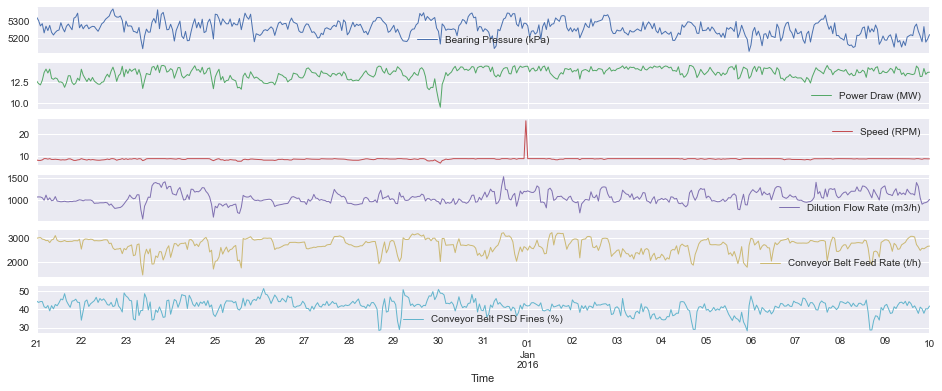

In [11]:
# median by hours
df_test.resample("h").median().plot(subplots=True, layout=(-1, 1), lw=1, figsize=(16, 6))
plt.show()

#### Analizing correlation

In [12]:
df_test.corr()

,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%)
Bearing Pressure (kPa),1.000000,0.195693,0.007087,0.107297,0.063115,-0.010708
Power Draw (MW),0.195693,1.000000,0.459781,0.485560,-0.024698,-0.113003
Speed (RPM),0.007087,0.459781,1.000000,0.240468,0.056753,0.016054
Dilution Flow Rate (m3/h),0.107297,0.485560,0.240468,1.000000,0.252792,0.039343
Conveyor Belt Feed Rate (t/h),0.063115,-0.024698,0.056753,0.252792,1.000000,0.493898
Conveyor Belt PSD Fines (%),-0.010708,-0.113003,0.016054,0.039343,0.493898,1.000000


## Training data

In [13]:
df_train.tail(3)

,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%)
Time,,,,,,
2015-12-19 23:58:00,5260.321858,13.392879,8.405826,932.982467,2877.573304,40.478775
2015-12-19 23:59:00,5244.054889,13.103755,8.239607,951.282578,2882.385391,47.955658
2015-12-20 00:00:00,5281.921060,13.024095,8.154889,971.209886,2861.211279,47.923199


In [14]:
df_train.shape

(138241, 6)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138241 entries, 2015-09-15 00:00:00 to 2015-12-20 00:00:00
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Bearing Pressure (kPa)         138240 non-null  float64
 1   Power Draw (MW)                138240 non-null  float64
 2   Speed (RPM)                    138241 non-null  float64
 3   Dilution Flow Rate (m3/h)      138239 non-null  float64
 4   Conveyor Belt Feed Rate (t/h)  138239 non-null  float64
 5   Conveyor Belt PSD Fines (%)    138239 non-null  float64
dtypes: float64(6)
memory usage: 7.4 MB


#### There are some null values.

In [16]:
# Select rows with null values
df_train[df_train.isna().any(axis=1)]

,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%)
Time,,,,,,
2015-09-25 16:15:00,NaN,NaN,0.000000,0.0,0.0,0.0
2015-09-26 19:37:00,5543.628732,13.707226,8.408340,NaN,NaN,NaN
2015-11-02 20:25:00,5226.401111,10.052786,6.977018,NaN,NaN,NaN


For handling the null values first we will compare the rows with null values with the last log before the null values.

In [369]:
df_train.loc[["2015-09-25 16:14:00"]]

,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%)
Time,,,,,,
2015-09-25 16:14:00,5198.186497,0.001388,2.481361e-34,0.0,0.0,0.0


In [18]:
df_train.loc[["2015-09-26 19:36:00"]]

,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%)
Time,,,,,,
2015-09-26 19:36:00,5568.896264,13.545424,8.369816,1273.06858,3089.401321,40.627232


In [19]:
df_train.loc[["2015-11-02 20:24:00"]]

,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%)
Time,,,,,,
2015-11-02 20:24:00,5224.032192,10.056661,6.977165,575.480176,1734.579298,52.906292


In this case, beacuse of the short time frame and the similarities with the last log  can be more appropiated to use the last value before the null value **(ffill)** rather than drop the rows or use the median to replace the value.

In [20]:
# ffill -> forward fill
df_train_no_nulls = df_train.fillna(method='ffill')

In [22]:
# statistics
df_train_no_nulls.describe()

,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%)
count,138241.000000,138241.000000,138241.000000,138241.000000,138241.000000,138241.000000
mean,5361.523864,12.647911,8.010549,914.572301,2397.461253,39.530806
std,202.317644,2.680492,1.617348,253.076717,667.784258,9.964693
min,35.651295,-0.073347,0.000000,0.000000,0.000000,0.000000
25%,5288.403958,12.441997,8.057497,844.107699,2214.845016,36.440289
50%,5363.159017,13.228314,8.421999,954.845114,2595.094886,41.042423
75%,5450.906260,13.943625,8.677781,1052.036404,2816.978574,44.861343
max,5995.657529,14.965945,8.730035,1636.474899,3594.124010,84.740463


#### Timeline is consistenly?

In [23]:
df_train_no_nulls.index

DatetimeIndex(['2015-09-15 00:00:00', '2015-09-15 00:01:00',
               '2015-09-15 00:02:00', '2015-09-15 00:03:00',
               '2015-09-15 00:04:00', '2015-09-15 00:05:00',
               '2015-09-15 00:06:00', '2015-09-15 00:07:00',
               '2015-09-15 00:08:00', '2015-09-15 00:09:00',
               ...
               '2015-12-19 23:51:00', '2015-12-19 23:52:00',
               '2015-12-19 23:53:00', '2015-12-19 23:54:00',
               '2015-12-19 23:55:00', '2015-12-19 23:56:00',
               '2015-12-19 23:57:00', '2015-12-19 23:58:00',
               '2015-12-19 23:59:00', '2015-12-20 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=138241, freq=None)

In [24]:
df_train_no_nulls.index[-1]-df_train_no_nulls.index[0]

Timedelta('96 days 00:00:00')

In [25]:
96*60*24

138240

Yes, our datetime is completed because we have 96 days and one more value from the last day '2015-12-20 00:00:00'.

#### Data visualization

#### Data visualization

#### Training data:

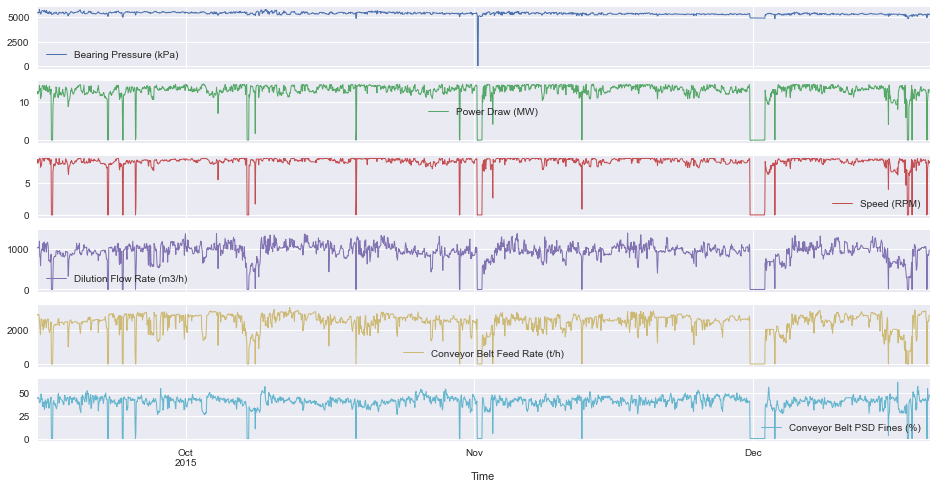

In [26]:
# median by hours, training data
df_train_no_nulls.resample("h").median().plot(subplots=True, layout=(-1, 1), lw=1, figsize=(16, 8))
plt.show()

#### Test data:

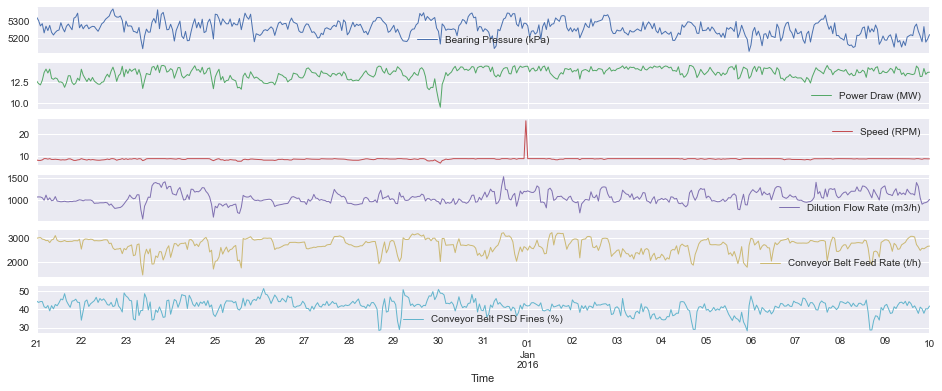

In [27]:
# median by hours, test data
df_test.resample("h").median().plot(subplots=True, layout=(-1, 1), lw=1, figsize=(16, 6))
plt.show()

As we can see in the train data we have some days where the values differs strongly from the median values. This may be due to breakdowns in the production process.

#### Analizing correlations

#### Training data:

In [28]:
df_train_no_nulls.corr()

,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%)
Bearing Pressure (kPa),1.000000,0.518881,0.484061,0.436879,0.344834,0.308345
Power Draw (MW),0.518881,1.000000,0.980502,0.760356,0.668068,0.623464
Speed (RPM),0.484061,0.980502,1.000000,0.766701,0.720555,0.696158
Dilution Flow Rate (m3/h),0.436879,0.760356,0.766701,1.000000,0.845890,0.626079
Conveyor Belt Feed Rate (t/h),0.344834,0.668068,0.720555,0.845890,1.000000,0.736704
Conveyor Belt PSD Fines (%),0.308345,0.623464,0.696158,0.626079,0.736704,1.000000


#### Test data:

In [29]:
df_test.corr()

,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%)
Bearing Pressure (kPa),1.000000,0.195693,0.007087,0.107297,0.063115,-0.010708
Power Draw (MW),0.195693,1.000000,0.459781,0.485560,-0.024698,-0.113003
Speed (RPM),0.007087,0.459781,1.000000,0.240468,0.056753,0.016054
Dilution Flow Rate (m3/h),0.107297,0.485560,0.240468,1.000000,0.252792,0.039343
Conveyor Belt Feed Rate (t/h),0.063115,-0.024698,0.056753,0.252792,1.000000,0.493898
Conveyor Belt PSD Fines (%),-0.010708,-0.113003,0.016054,0.039343,0.493898,1.000000


In our training and test data sets the correlation differs strongly. The two variables that we need to predict are **Bearing Pressure (kPa)** and **Power Draw (MW)**. This variables are correlated with the other as we can see specially in our training data set.

### Subset by dates

In [31]:
df_train_no_nulls.tail(3)

,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%)
Time,,,,,,
2015-12-19 23:56:00,5291.038653,13.661863,8.709156,943.244733,2876.678675,50.263821
2015-12-19 23:57:00,5306.966515,13.610935,8.603212,976.361162,2813.859524,44.921227
2015-12-19 23:58:00,5260.321858,13.392879,8.405826,932.982467,2877.573304,40.478775
2015-12-19 23:59:00,5244.054889,13.103755,8.239607,951.282578,2882.385391,47.955658
2015-12-20 00:00:00,5281.921060,13.024095,8.154889,971.209886,2861.211279,47.923199


In [32]:
# subset by range of dates and time
df_date_subs=df_train_no_nulls["2015-11-20 22:00:00":"2015-11-20 22:20:00"]

In [33]:
df_date_subs.tail(2)

,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%)
Time,,,,,,
2015-11-20 22:19:00,5225.120430,12.901870,8.333717,882.202355,2739.244053,46.574944
2015-11-20 22:20:00,5261.014971,12.952951,8.335187,940.684119,2729.151924,41.196285


#### Subset Visualization

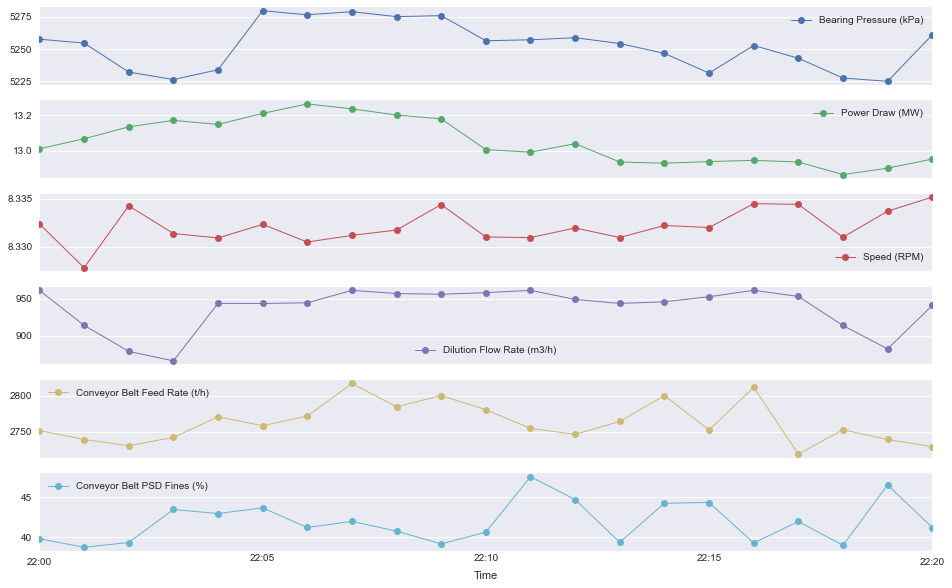

In [34]:
df_date_subs.plot(subplots=True, layout=(-1, 1), lw=1, figsize=(16, 10), marker = 'o')
plt.show()

#### Now we will check if the subset data differs from the mean

In [35]:
df_train_no_nulls.mean()

Bearing Pressure (kPa)           5361.523864
Power Draw (MW)                    12.647911
Speed (RPM)                         8.010549
Dilution Flow Rate (m3/h)         914.572301
Conveyor Belt Feed Rate (t/h)    2397.461253
Conveyor Belt PSD Fines (%)        39.530806
dtype: float64

In [36]:
df_date_subs.mean()

Bearing Pressure (kPa)           5252.670405
Power Draw (MW)                    13.051363
Speed (RPM)                         8.332137
Dilution Flow Rate (m3/h)         937.360735
Conveyor Belt Feed Rate (t/h)    2762.665741
Conveyor Belt PSD Fines (%)        41.898262
dtype: float64

As we can see both means are similar.

## Data Modeling

Before creating a model we need to know how is the data that we have and what we want to get. 



###  Time series forecasting using LSTM

Long short-term memory (LSTM) is a neural network will allow to train a model that does predictions using multiple inputs and time series.

In [197]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

### Bearing Pressure (kPa)

LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized.

In [199]:
# normalize the data
scaler = StandardScaler()
scaler = scaler.fit(df_train_no_nulls)
df_for_training_scaled = scaler.transform(df_train_no_nulls)

As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 


In [201]:
# Empty lists will be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of minutes we want to look into the future, first we will do with 1 next with 5 minutes.
n_past = 20  # Number of past minutes we want to use to predict the future.

In [202]:
#Reformat input data into a shape: (n_samples x timesteps x n_features)
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_train_no_nulls.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (138221, 20, 6).
trainY shape == (138221, 1).


Our original dataset has 138241 rows, our training dataset has 138221, 20 rows less. 20 is the 20 minutes that we look back and 6 the variables. And Y 1 because by now we want to predict the next minute.

#### Create the model

In [203]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

In [204]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 64)            18176     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


In [205]:
# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=20, validation_split=0.1, verbose=1)

Epoch 1/5
7775/7775 [==============================] - 566s 69ms/step - loss: 2.9166 - val_loss: 0.0197
Epoch 2/5
7775/7775 [==============================] - 520s 67ms/step - loss: 0.7026 - val_loss: 0.0443
Epoch 3/5
7775/7775 [==============================] - 511s 66ms/step - loss: 0.5922 - val_loss: 0.1013
Epoch 4/5
7775/7775 [==============================] - 484s 62ms/step - loss: 6.5991 - val_loss: 0.0796
Epoch 5/5
7775/7775 [==============================] - 527s 68ms/step - loss: 2.6900 - val_loss: 2.8340


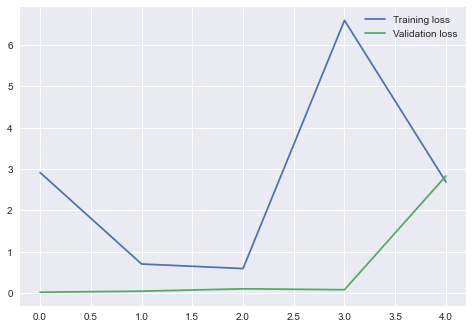

In [206]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

#### Forecasting

In [374]:
# now we will do the 5 minutes prediction
n_future=5

In [225]:
train_dates = df_date_subs.index

In [227]:
# extract the right dates and next go to 5 minutes into the future
forecast_period_dates= pd.date_range(list(train_dates)[-1], periods=n_future, freq='1min').tolist() 
forecast=model.predict(trainX[-n_future:])

In [229]:
forecast

array([[-0.27369255],
       [-0.30171645],
       [-0.29844645],
       [-0.35641026],
       [-0.4018065 ]], dtype=float32)

We need to perform inverse transformation to rescale back to original range.

In [232]:
prediction_copies = np.repeat(forecast, df_train_no_nulls.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

#### Predicted Bearing Pressure (kPa):

In [233]:
y_pred_future

array([5306.1514, 5300.4814, 5301.143 , 5289.416 , 5280.2314],
      dtype=float32)

In [242]:
d_kpa = {'Time': ['2015-11-20 22:25:00'], 'Bearing Pressure (kPa)': [5280.2314]}

In [256]:
df_kpa = pd.DataFrame(data=d_kpa)
df_kpa['Time'] = pd.to_datetime(df_kpa['Time'])
df_kpa= df_kpa.set_index('Time')

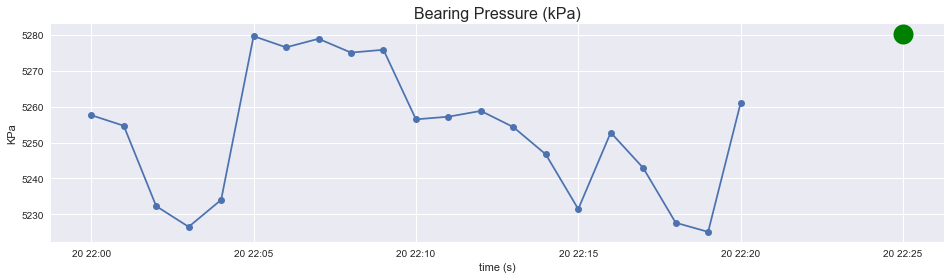

In [380]:
fig, ax = plt.subplots(figsize=(16, 4))

ax.set(xlabel='time (s)', ylabel='KPa', title='Bearing Pressure (kPa)')
ax.title.set_size(16)
ax.plot(df_date_subs["Bearing Pressure (kPa)"], marker = 'o')
ax.plot(df_kpa['Bearing Pressure (kPa)'], color = 'green', marker="o", markersize=20)
plt.savefig('bearing_pressure.png')
#plt.show()

### Power Draw (MW)

In [309]:
df_train_no_nulls_pw_draw = df_train_no_nulls[['Power Draw (MW)', 'Bearing Pressure (kPa)','Speed (RPM)','Dilution Flow Rate (m3/h)', 'Conveyor Belt Feed Rate (t/h)','Conveyor Belt PSD Fines (%)'  ]]

In [311]:
# normalize the data
scaler = StandardScaler()
scaler = scaler.fit(df_train_no_nulls_pw_draw)
df_for_training_scaled = scaler.transform(df_train_no_nulls_pw_draw)

In [312]:
trainX = []
trainY = []

n_future = 1   # Number of minutes we want to look into the future, first we will do with 1 next with 5 minutes.
n_past = 20    # Number of past minutes we want to use to predict the future.

In [313]:
#Reformat input data into a shape: (n_samples x timesteps x n_features)
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_train_no_nulls.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (138221, 20, 6).
trainY shape == (138221, 1).


Our original dataset has 138241 rows, our training dataset has 138221, 20 rows less. 20 is the 20 minutes that we look back and 6 the variables. The second dimension of Y is because by now we will predict the next minute.


#### Create the model:

In [314]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

In [315]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 20, 64)            18176     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


In [316]:
# fit the model
history_pw_draw = model.fit(trainX, trainY, epochs=5, batch_size=20, validation_split=0.1, verbose=1)

Epoch 1/5
6220/6220 [==============================] - 486s 75ms/step - loss: 0.4108 - val_loss: 0.0125
Epoch 2/5
6220/6220 [==============================] - 455s 73ms/step - loss: 0.0249 - val_loss: 0.0066
Epoch 3/5
6220/6220 [==============================] - 564s 91ms/step - loss: 0.0228 - val_loss: 0.0054
Epoch 4/5
6220/6220 [==============================] - 512s 82ms/step - loss: 0.0208 - val_loss: 0.0066
Epoch 5/5
6220/6220 [==============================] - 520s 84ms/step - loss: 0.0210 - val_loss: 0.0058


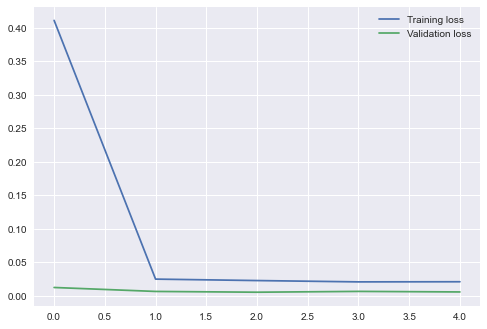

In [319]:
plt.plot(history_pw_draw.history['loss'], label='Training loss')
plt.plot(history_pw_draw.history['val_loss'], label='Validation loss')
plt.legend()

#### Forecasting

In [321]:
n_future=5

In [322]:
train_dates = df_date_subs.index

In [323]:
forecast_period_dates= pd.date_range(list(train_dates)[-1], periods=n_future, freq='1min').tolist()

In [324]:
forecast=model.predict(trainX[-n_future:])

1/1 [==============================] - 2s 2s/step


In [325]:
forecast

array([[0.30007526],
       [0.31918284],
       [0.29953662],
       [0.2289486 ],
       [0.13450736]], dtype=float32)

Perform inverse transformation to rescale back to original range.

In [326]:
prediction_copies = np.repeat(forecast, df_train_no_nulls.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

#### Predicted Power Draw:

In [327]:
y_pred_future

array([13.452257, 13.503475, 13.450813, 13.261603, 13.008455],
      dtype=float32)

In [334]:
d_pw_draw = {'Time': ['2015-11-20 22:25:00'], 'Power Draw (MW)': [13.008455]}

In [335]:
d_pw_draw = pd.DataFrame(data=d_pw_draw)
d_pw_draw['Time'] = pd.to_datetime(d_pw_draw['Time'])
d_pw_draw= d_pw_draw.set_index('Time')

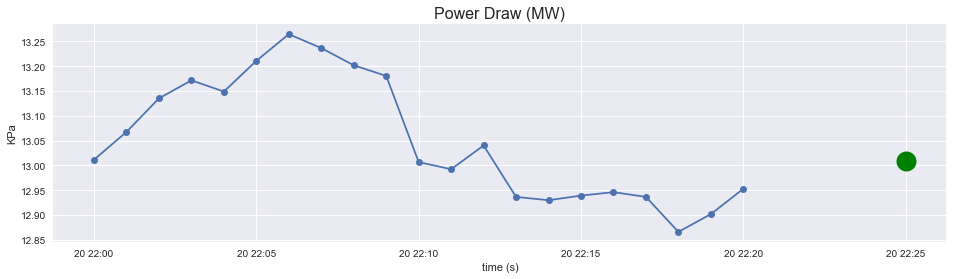

In [379]:
fig, ax = plt.subplots(figsize=(16, 4))

ax.set(xlabel='time (s)', ylabel='KPa', title='Power Draw (MW)')
ax.title.set_size(16)
ax.plot(df_date_subs['Power Draw (MW)'], marker = 'o')
ax.plot(d_pw_draw['Power Draw (MW)'], color = 'green', marker="o", markersize=20)
#plt.show()
plt.savefig('power_draw.png')

# Errors

### Bearing Pressure (kPa)

In [ ]:
target_cols = ['Bearing Pressure (kPa)', 'Power Draw (MW)'] 

In [342]:
actual=df_train_no_nulls["2015-11-20 22:21:00":"2015-11-20 22:25:00"][target_cols]

In [354]:
predicted_data = {'Time': ['2015-11-20 22:21:00','2015-11-20 22:22:00','2015-11-20 22:23:00','2015-11-20 22:24:00', '2015-11-20 22:25:00'],
             'Bearing Pressure (kPa)': [5306.1514, 5300.4814, 5301.143 , 5289.416 , 5280.2314], # predicted bearing preassure
             'Power Draw (MW)': [13.452257, 13.503475, 13.450813, 13.261603, 13.00845]}  # predicted power draw

In [355]:
predicted = pd.DataFrame(data=predicted_data)
predicted['Time'] = pd.to_datetime(predicted['Time'])
predicted= predicted.set_index('Time')

In [357]:
errors = predicted - actual

In [366]:
errors

,Bearing Pressure (kPa),Power Draw (MW)
Time,,
2015-11-20 22:21:00,37.399818,0.524142
2015-11-20 22:22:00,56.419936,0.468135
2015-11-20 22:23:00,77.528241,0.382485
2015-11-20 22:24:00,38.822444,0.128959
2015-11-20 22:25:00,44.242824,-0.103941


In [359]:
rmse = (errors**2).mean()**0.5
rmse

Bearing Pressure (kPa)    53.023001
Power Draw (MW)            0.365405
dtype: float64

### Error histograms


#### Bearing Pressure (kPa)

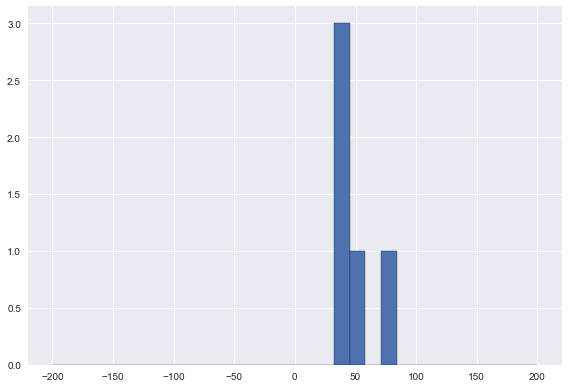

In [363]:
errors['Bearing Pressure (kPa)'].hist(bins=31, range=(-200, 200), edgecolor="k")
plt.tight_layout()

#### Power Draw

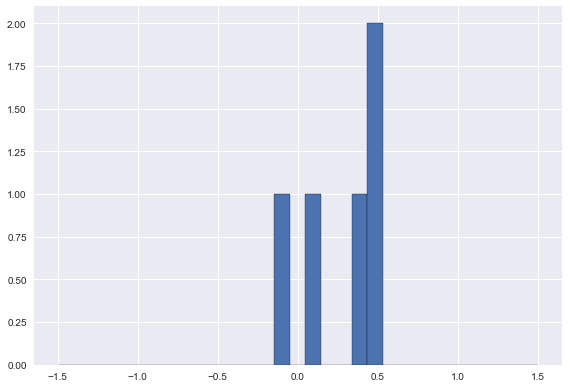

In [364]:
errors['Power Draw (MW)'].hist(bins=31, range=(-1.5, 1.5), edgecolor="k")
plt.tight_layout()